In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
N = 2**6+1

**Roundoff** VS **Truncation**


In [5]:
x = linspace(0.995,1,N)
x

array([0.995     , 0.99507813, 0.99515625, 0.99523438, 0.9953125 ,
       0.99539062, 0.99546875, 0.99554687, 0.995625  , 0.99570313,
       0.99578125, 0.99585937, 0.9959375 , 0.99601562, 0.99609375,
       0.99617188, 0.99625   , 0.99632813, 0.99640625, 0.99648437,
       0.9965625 , 0.99664062, 0.99671875, 0.99679688, 0.996875  ,
       0.99695312, 0.99703125, 0.99710937, 0.9971875 , 0.99726563,
       0.99734375, 0.99742188, 0.9975    , 0.99757812, 0.99765625,
       0.99773437, 0.9978125 , 0.99789063, 0.99796875, 0.99804688,
       0.998125  , 0.99820312, 0.99828125, 0.99835938, 0.9984375 ,
       0.99851563, 0.99859375, 0.99867187, 0.99875   , 0.99882812,
       0.99890625, 0.99898438, 0.9990625 , 0.99914063, 0.99921875,
       0.99929687, 0.999375  , 0.99945313, 0.99953125, 0.99960938,
       0.9996875 , 0.99976562, 0.99984375, 0.99992187, 1.        ])

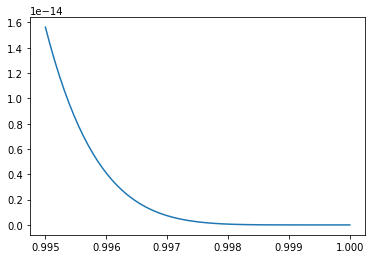

In [6]:
plot(x, (1-x)**6)

In [0]:
import sympy

In [9]:
X = sympy.var('x')
sympy.expand((1-X)**6)

x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1

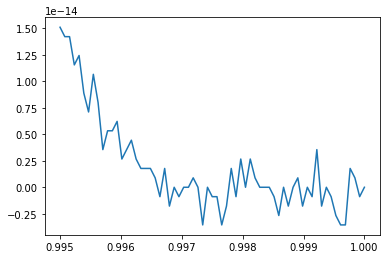

In [10]:
x = linspace(0.995,1,N)
plot(x, x**6 - 6*x**5 + 15*x**4 - 20*x**3 + 15*x**2 - 6*x + 1)

In [15]:
0.1 + 1e1

10.1

In [26]:
# Generate a matrix filled by random numbers
A = random.random((50,50))
A.shape

# Condition
K = linalg.cond(A)
K

6425.95212569317

In [42]:
estimated_k = 0

for i in range(1000):
  # Generate for calculating the relative condition
  x = random.random((50,1))
  norm_x = linalg.norm(x)

  # Generate a random perturbation
  dx = random.random((50,1))
  norm_dx = linalg.norm(dx)

  # y = A*x
  y = A.dot(x)
  norm_y = linalg.norm(y)

  # We want this number as small as possible dy = A*dx (linearity cond)
  norm_dy = linalg.norm(A.dot(dx))

  linalg.norm(x), normy

  # How much risk. If condition number is small, small changes, larger, changes 
  # are larger
  kx = (norm_dy/norm_y) / (norm_dx/norm_x)
  estimated_k = max(estimated_k, kx)
  https://www.ibm.com/support/knowledgecenter/SSGH2K_13.1.0/com.ibm.xlc131.aix.doc/compiler_ref/ruomprun4.html
estimated_k

# SNR = 1/Cond
# Cond what to expect in the output (perturbed). We want low Cond Numbers

# A 0.97, 1.11 are OK condition numbers, 1.11 is not too much though


1.113891659098594

In [39]:
kx, norm_x, norm_y, norm_dx, norm_dy, K

(1.0267967643393592,
 3.8536094983926534,
 80.43863421314661,
 3.4551111330988666,
 74.05314314362683,
 6425.95212569317)

Now we try to estimate truncation errors

In [0]:
def FD(f, x, dx):
  return (f(x+dx)-f(x))/dx

In [0]:
N = 2**6+1
x = linspace(0,1,N)

In [0]:

def myf(x):
  return sin(pi*x)

y = myf
yprime = cos(pi*x)*pi

# Approx
fd = FD(y,x,1)

In [0]:
# Banach is a space of objects. You can take elements and have linear... The results will remain in the space
# Collection of objects where is possible to measure them

def supnorm(f):
  return max(f)

supnorm(yprime)

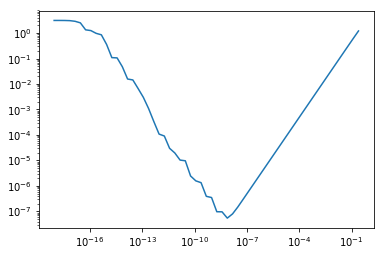

In [78]:
#plot(x,yprime, 'ro')

dxs = []
errors = []

for i in range(2,61):
  dx = 2**(-i)
  dxs.append(dx)
  FDprime = FD(myf,x,2**(-i))
  #plot(x,FDprime)
  error = supnorm(yprime-FDprime)
  errors.append(error)
  
# The step (perturbation) vs the error acquired
loglog(dxs, errors)

In [0]:
# The error decreases at 1e-8. Then, we are getting truncating errors. 
# Before that point, we get precision errors